# Dependencies

In [20]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import mplfinance as mpf #candlesticks are part of this library
import matplotlib.dates as mdates #matplotlib doesn't work with datetime
import numpy as np
from path import Path


#style of chart
plt.style.use('ggplot')

# Getting Stock Data from API

In [3]:

#Setting the start and end parameter for the DataReader
start = dt.datetime(2008,1,1)
end = dt.datetime(2020,11,30)


#Using pandas datareader to pull Apple stock data from yahoo finance
 
appl_df = web.DataReader('AAPL', 'yahoo', start, end)


appl_df.sample(n=10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-05-03,12.496072,12.343572,12.428214,12.435715,313348000.0,10.727681
2016-09-01,26.700001,26.405001,26.535000,26.682501,106806000.0,25.141504
2019-04-23,51.937500,50.974998,51.107498,51.869999,93292000.0,50.881939
2012-05-07,20.456072,20.043928,20.053572,20.338572,460118400.0,17.545088
2009-09-01,6.071429,5.890714,5.999643,5.903572,469028000.0,5.092722
2018-05-04,46.062500,44.542500,44.562500,45.957500,224805200.0,44.405891
2016-09-16,29.032499,28.510000,28.780001,28.730000,319547600.0,27.070753
2012-01-10,15.214286,15.053572,15.211071,15.115714,258196400.0,13.039587
2011-05-23,11.999286,11.765000,11.784643,11.942857,383600000.0,10.302515


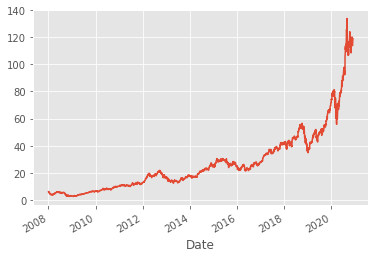

In [4]:
#Plot the Adjusted close price

appl_df['Adj Close'].plot()
plt.show()      #Plot the dataframe

# Data Manipulation

In [5]:
#Adding 100 day moving average

appl_df["100MA"]= appl_df["Adj Close"].rolling(window=100, min_periods=0).mean()
#appl_df.dropna(inplace=True)


appl_df.head()

,High,Low,Open,Close,Volume,Adj Close,100MA
Date,,,,,,,
2008-01-02,7.152143,6.876786,7.116786,6.958571,1.079179e+09,6.002817,6.002817
2008-01-03,7.049643,6.881786,6.978929,6.961786,8.420664e+08,6.005591,6.004204
2008-01-04,6.892857,6.388928,6.837500,6.430357,1.455832e+09,5.547154,5.851854
2008-01-07,6.557143,6.079643,6.473214,6.344285,2.072193e+09,5.472904,5.757116
2008-01-08,6.516428,6.100000,6.433571,6.116071,1.523816e+09,5.276035,5.660900


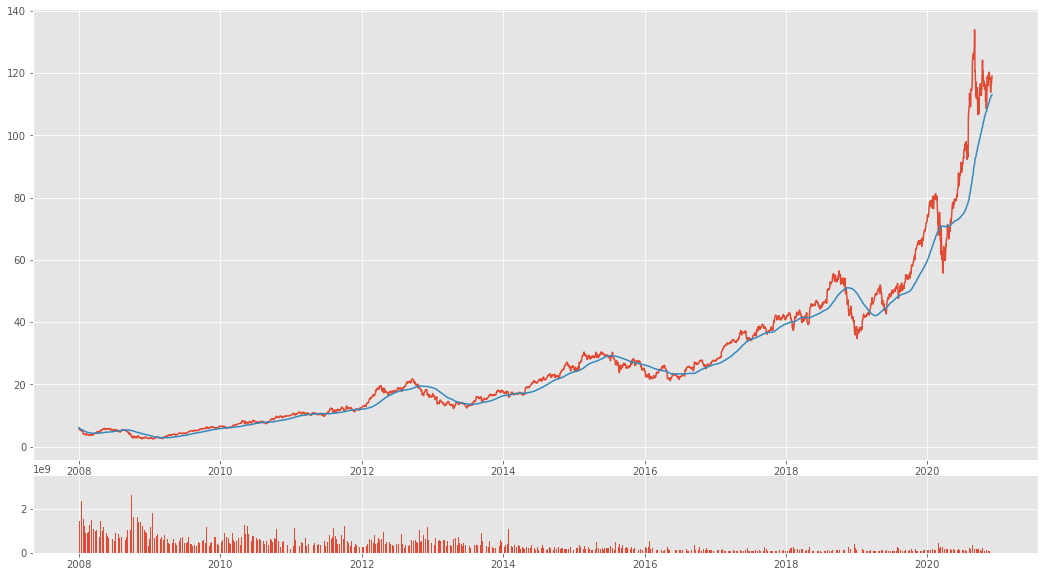

In [16]:
#plotting the close price, 100 day moving average, and Volume
plt.figure(figsize=(18,10))

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=5, colspan=1, sharex=ax1)



ax1.plot(appl_df.index, appl_df['Adj Close'])
ax1.plot(appl_df.index, appl_df['100MA'])
ax2.bar(appl_df.index, appl_df['Volume'])


plt.show()

In [39]:
#OHLC = Open, High, Low, Close
df_ohlc = appl_df['Adj Close'].resample('10D').ohlc()

#Volume
df_volume = appl_df['Volume'].resample('10D').sum()

In [45]:
df_ohlc.dtypes

Date     datetime64[ns]
open            float64
high            float64
low             float64
close           float64
dtype: object

In [14]:
#df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num) # converts datetime to mdates for candlestick chart

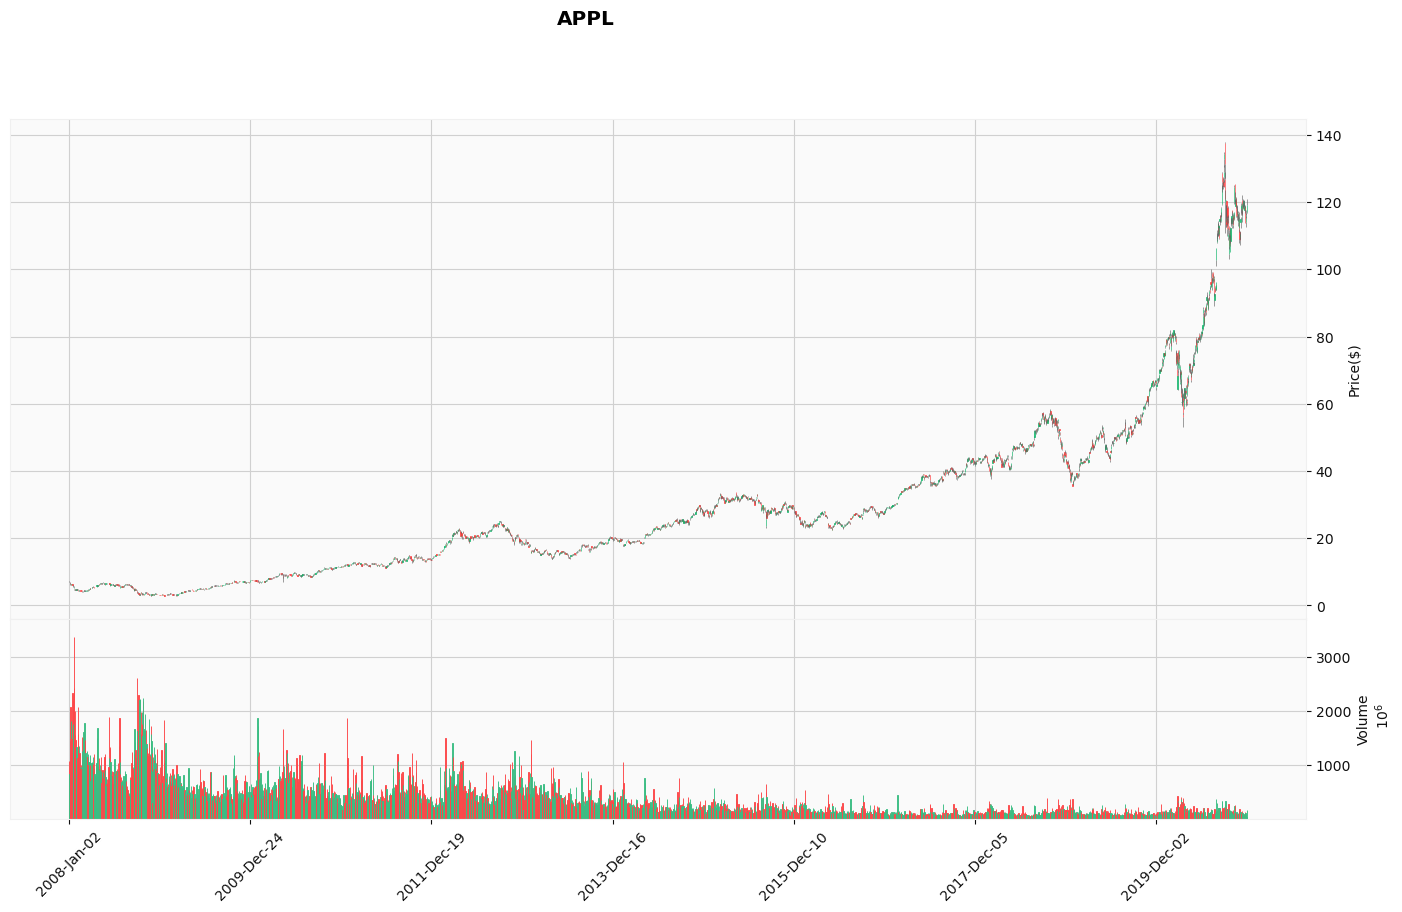

In [69]:
mpf.plot(appl_df, type="candle", style="yahoo",title="APPL", ylabel="Price($)", ylabel_lower="Volume", volume=True, figsize=(18,10))